# MDN learns a simple distribution of QPSK

In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow_probability import distributions as tfd
from scipy import stats

from src.models.autoencoder import MDN_model
from src.models.MDN_models import get_mixture_loss_func

# Generate training data

In [42]:
p1=[1,1]
p2=[1,-1]
p3=[-1,1]
p4=[-1,-1]
P=[p1,p2,p3,p4]
print(P)

[[1, 1], [1, -1], [-1, 1], [-1, -1]]


In [43]:
number_symbols = 1
number_silence = 1
N_HIDDEN=20
OUTPUT_DIMS=number_symbols*2
N_MIXES=1
number_bits = 4
k=2
n =2 
M = 2**k
R = k/n

In [44]:
M=4
N=10000
label_train = np.random.randint(M,size=N)
print(label_train)
x=np.zeros((len(label_train),2))
y=np.zeros((len(label_train),2))
for i in range(len(label_train)):
    #label_train[i]
    x[i,:]=P[label_train[i]]
    y[i,:]=P[label_train[i]]+np.random.normal(0,0.3,size=(1,2))
    
    

[2 0 0 ... 0 3 0]


# Train MDN model

In [17]:
mdn_model=MDN_model(N_HIDDEN, OUTPUT_DIMS, N_MIXES)
mdn_model.compile(loss=get_mixture_loss_func(OUTPUT_DIMS,N_MIXES), optimizer=tf.keras.optimizers.Adam())
hist =mdn_model.fit(x=x, y=y, batch_size=128, epochs=100, validation_split=0.5)


Epoch 1/100
40/40 [==============================] - 1s 8ms/step - loss: 2.3995 - val_loss: 2.0754
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 1.7919 - val_loss: 1.4621
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 1.1406 - val_loss: 0.8341
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.7162 - val_loss: 0.6225
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5665 - val_loss: 0.5096
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4884 - val_loss: 0.4670
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4585 - val_loss: 0.4482
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4510 - val_loss: 0.4514
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4436 - val_loss: 0.4520
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4516 - val_loss: 0.4451
Epoch 11/

dict_keys(['loss', 'val_loss'])


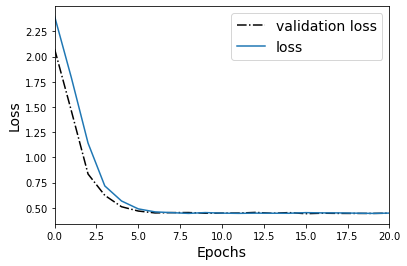

In [20]:
%matplotlib inline
print(hist.history.keys())
fig=plt.figure()
plt.plot(hist.history['val_loss'],label='validation loss',c='k',ls='-.')
plt.plot(hist.history['loss'],label='loss',ls='-')
plt.xlim([0,20])
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend(fontsize=14)
#fig.savefig('Lossawgn.png')

In [30]:
from src.models.MDN_models import sample_from_output, softmax

In [33]:
M=4
N=5000
label = np.random.randint(M,size=N)

x_test=np.zeros((len(label),2))
y_test1=np.zeros((len(label),2))
for i in range(len(label)):
    x_test[i,:]=P[label[i]]
    y_test1[i,:]=P[label[i]]+np.random.normal(0,0.3,size=[1,2])
    
y_test=mdn_model.predict(x_test)

mus = np.apply_along_axis((lambda a: a[:N_MIXES*OUTPUT_DIMS]), 1, y_test)
sigs = np.apply_along_axis((lambda a: a[N_MIXES*OUTPUT_DIMS:2*N_MIXES*OUTPUT_DIMS]), 1, y_test)
pis = np.apply_along_axis((lambda a: softmax(a[-N_MIXES:])), 1, y_test)
y_samples = np.apply_along_axis(sample_from_output, 1, y_test, OUTPUT_DIMS, N_MIXES, temp=1.0, sigma_temp=1.0)

   

157/157 [==============================] - 0s 910us/step


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

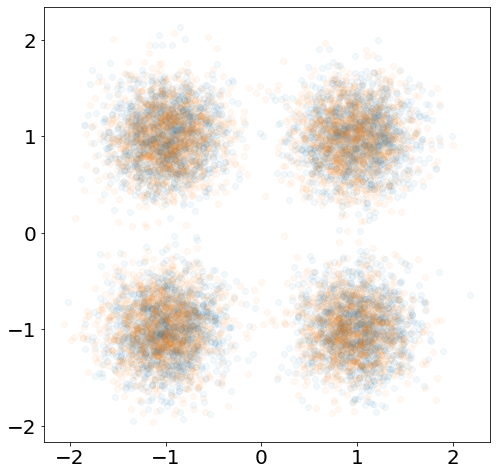

In [39]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(y_test1[:,0], y_test1[:,1], alpha=0.05)
ax.scatter(y_samples.T[0], y_samples.T[1], alpha=0.05) 
plt.xticks(size = 20)
plt.yticks(size = 20)
